In [2]:
from analysis.plot import *
from analysis.plot_results import *

setupName = "2j_2j_2s_4a_0pe"

In [ ]:
plotResultsForSimulation(setupName)

In [ ]:
fileName = "outputs/%s/gasdens11.dat" % setupName
parFile = "setups/fargo/%s.par" % setupName
logRadialSpacing = True

plotPolar(fileName, parFile, logRadialSpacing, logScale=True)

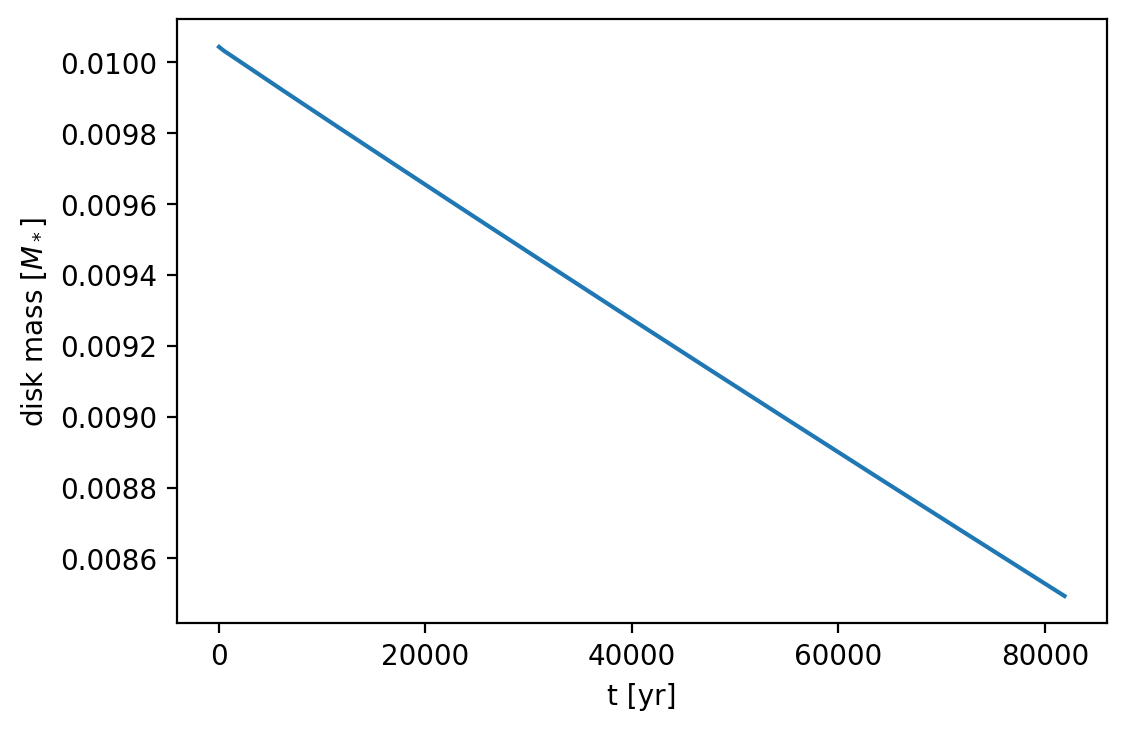

In [5]:
setupName = "photoevap_test_2pe"
parFile = "setups/fargo/%s.par" % setupName

plotMassOfDisk(setupName, parFile, logRadialSpacing=True)

In [6]:
def plotMassOfDiskMulti(setupNames, parFiles, logRadialSpacing, useRealUnits=False, saveFileName=None, show=True):
    plt.figure(dpi=dpi)

    for (setupName, parFile) in zip(setupNames, parFiles):

        lastOutputNo = findLastOutputNumber(setupName)
        mass = []

        for i in range(lastOutputNo+1):
            fileName = "outputs/%s/gasdens%d.dat" % (setupName, i)

            m = integrateDensity(fileName, parFile, logRadialSpacing, useRealUnits=useRealUnits)
            mass.append(m)


        # Calculate the times corresponding to each output
        dt, Ninterm = getParameters(["DT", "Ninterm"], parFile)

        indices = list(range(lastOutputNo+1))
        time = [i * dt * Ninterm for i in indices] # the time in scale-free units
        time = convertToRealTime(np.array(time)) # convert to real units


        # Plot results
        plt.plot(time, mass)


    plt.xlabel("t [%s]" % unit_of_time)
    plt.ylabel("disk mass [$M_*$]")

    if saveFileName: plt.savefig(saveFileName, dpi=dpi)
    showFigure(show)


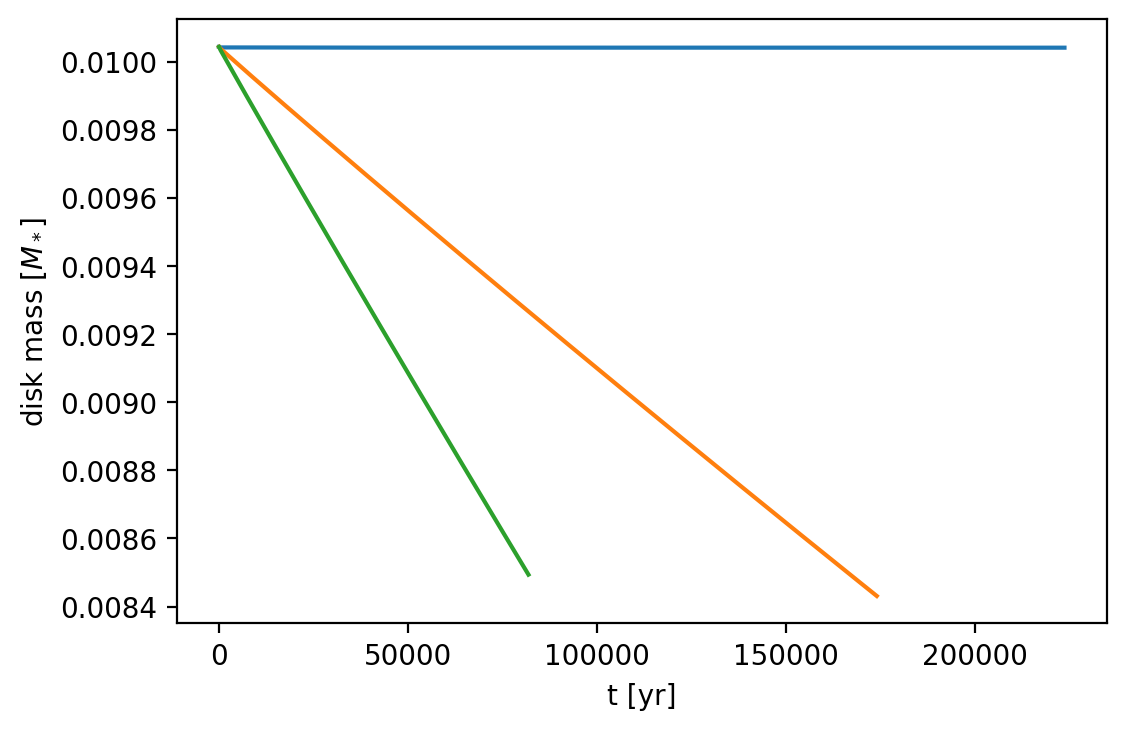

In [10]:
setupNames = ["photoevap_test_%dpe" % i for i in range(3)]
parFiles = ["setups/fargo/%s.par" % setupName for setupName in setupNames]

plotMassOfDiskMulti(setupNames, parFiles, logRadialSpacing=True)

In [14]:
initMass = integrateDensity("outputs/photoevap_test_1pe/gasdens0.dat", "setups/fargo/photoevap_test_1pe.par", logRadialSpacing=True)
finMass = integrateDensity("outputs/photoevap_test_1pe/gasdens389.dat", "setups/fargo/photoevap_test_1pe.par", logRadialSpacing=True)

In [15]:
initMass - finMass

0.001612264487375066

In [19]:
time = 389 * 0.314159265359 * 100 # the time in scale-free units
# time = 12220.8
time = convertToRealTime(time) # convert to real units

time

174100.43663021375

In [17]:
(initMass - finMass)/time

9.260542469514234e-09

In [21]:
initMass = integrateDensity("outputs/photoevap_test_2pe/gasdens0.dat", "setups/fargo/photoevap_test_2pe.par", logRadialSpacing=True)
finMass = integrateDensity("outputs/photoevap_test_2pe/gasdens183.dat", "setups/fargo/photoevap_test_2pe.par", logRadialSpacing=True)

In [22]:
initMass - finMass

0.0015495190078374695

In [23]:
time = 183 * 0.314159265359 * 100 # the time in scale-free units
# time = 12220.8
time = convertToRealTime(time) # convert to real units

time

81903.2902399206

In [24]:
(initMass - finMass)/time

1.891888596048387e-08

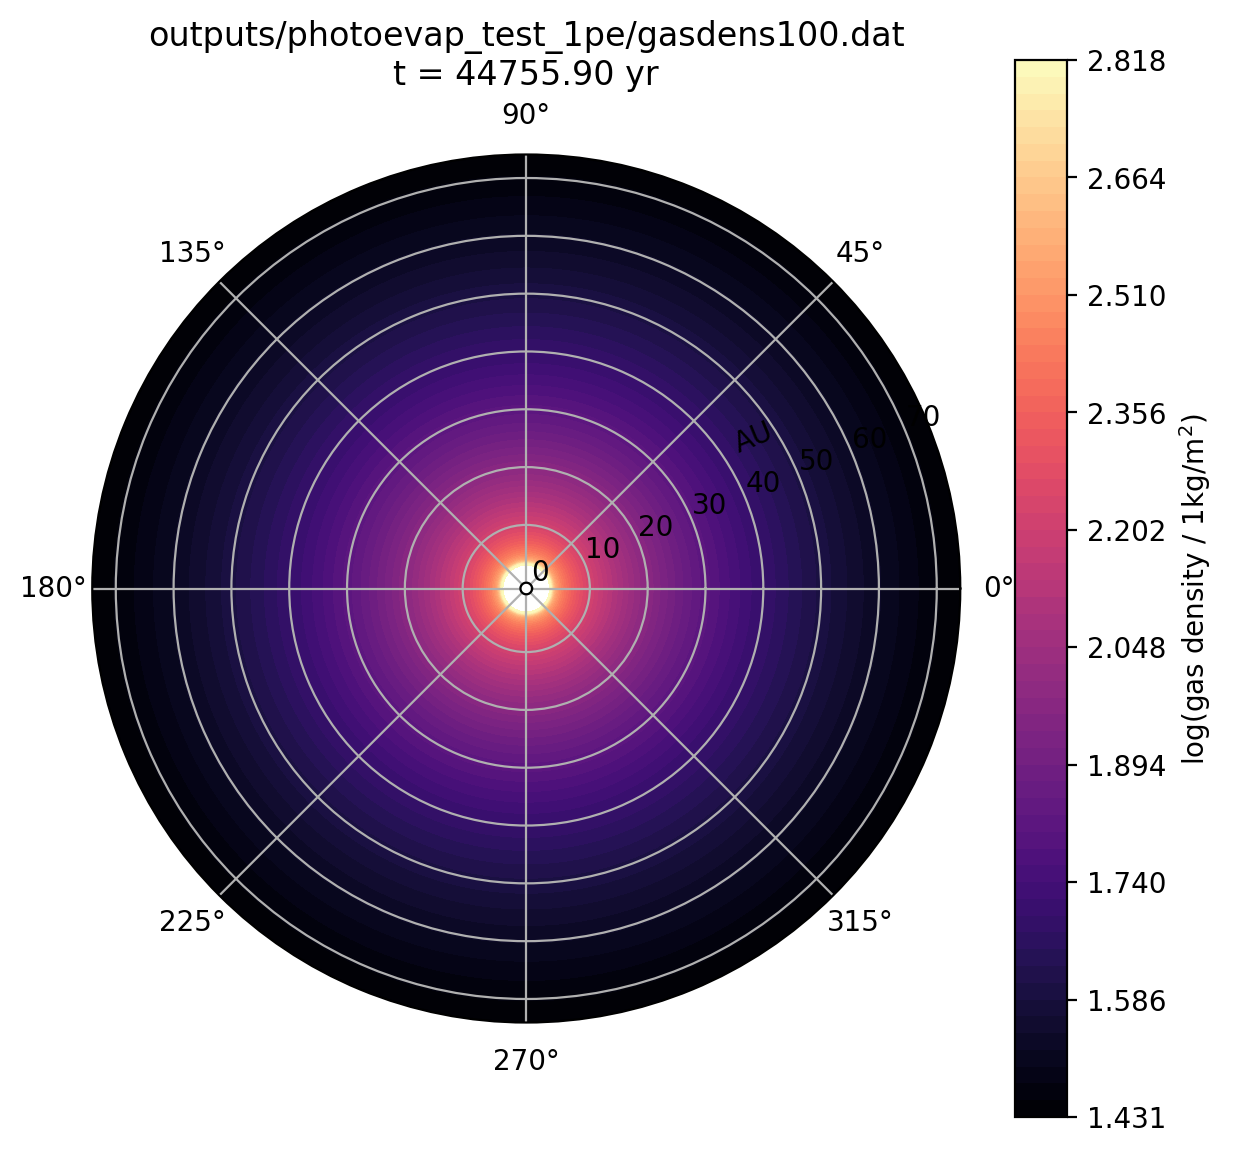

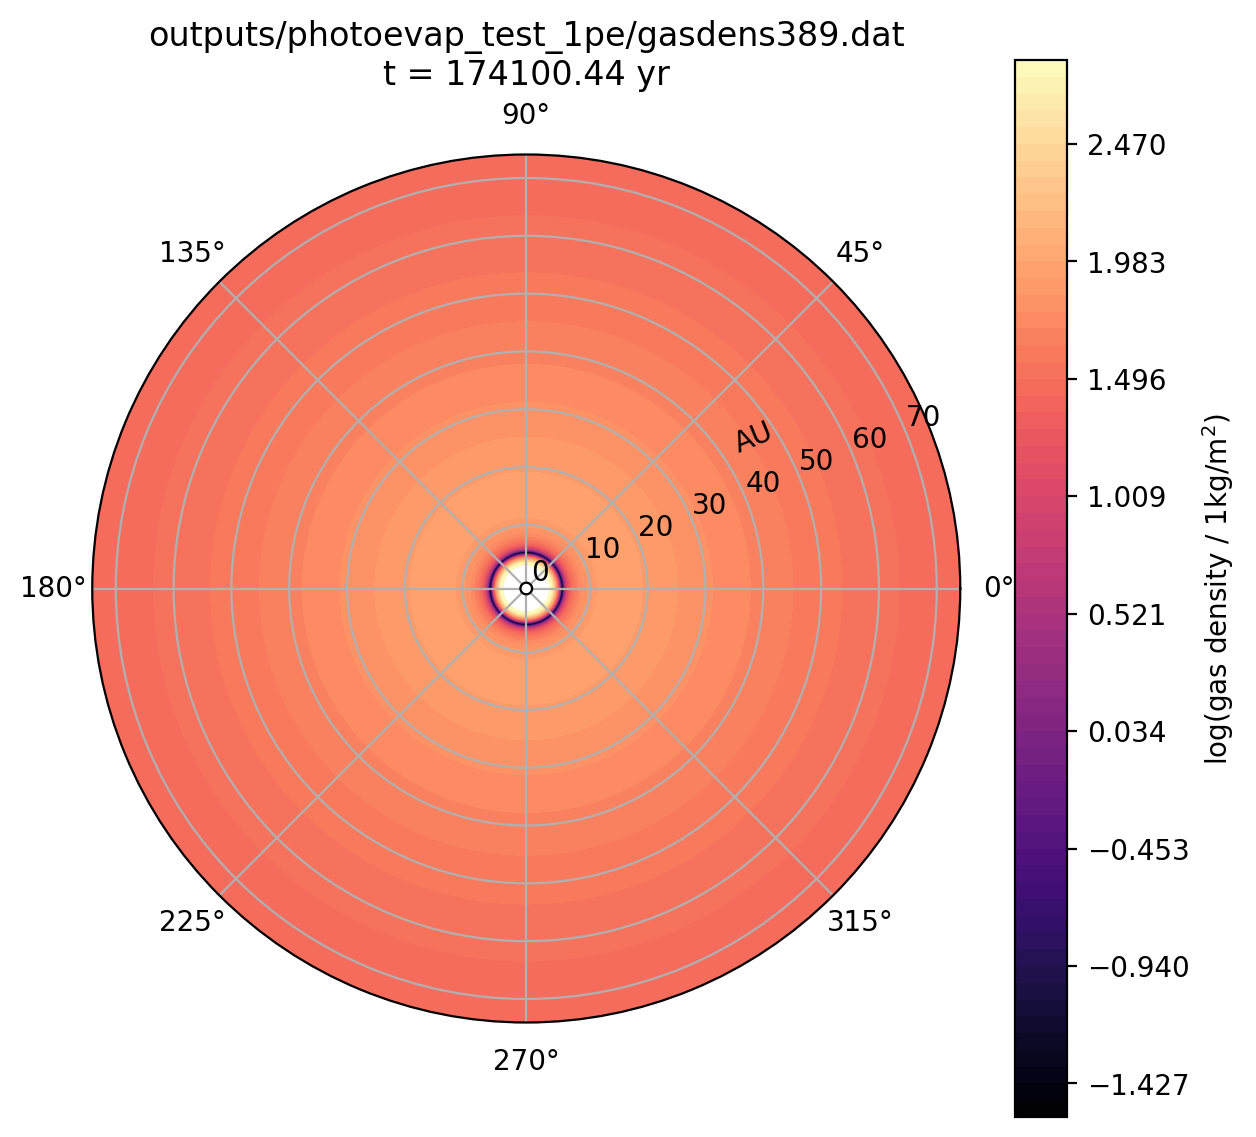

array([1400., 1400.])

In [27]:
plotPolar("outputs/photoevap_test_1pe/gasdens100.dat", "setups/fargo/photoevap_test_1pe.par", True)
plotPolar("outputs/photoevap_test_1pe/gasdens389.dat", "setups/fargo/photoevap_test_1pe.par", True)

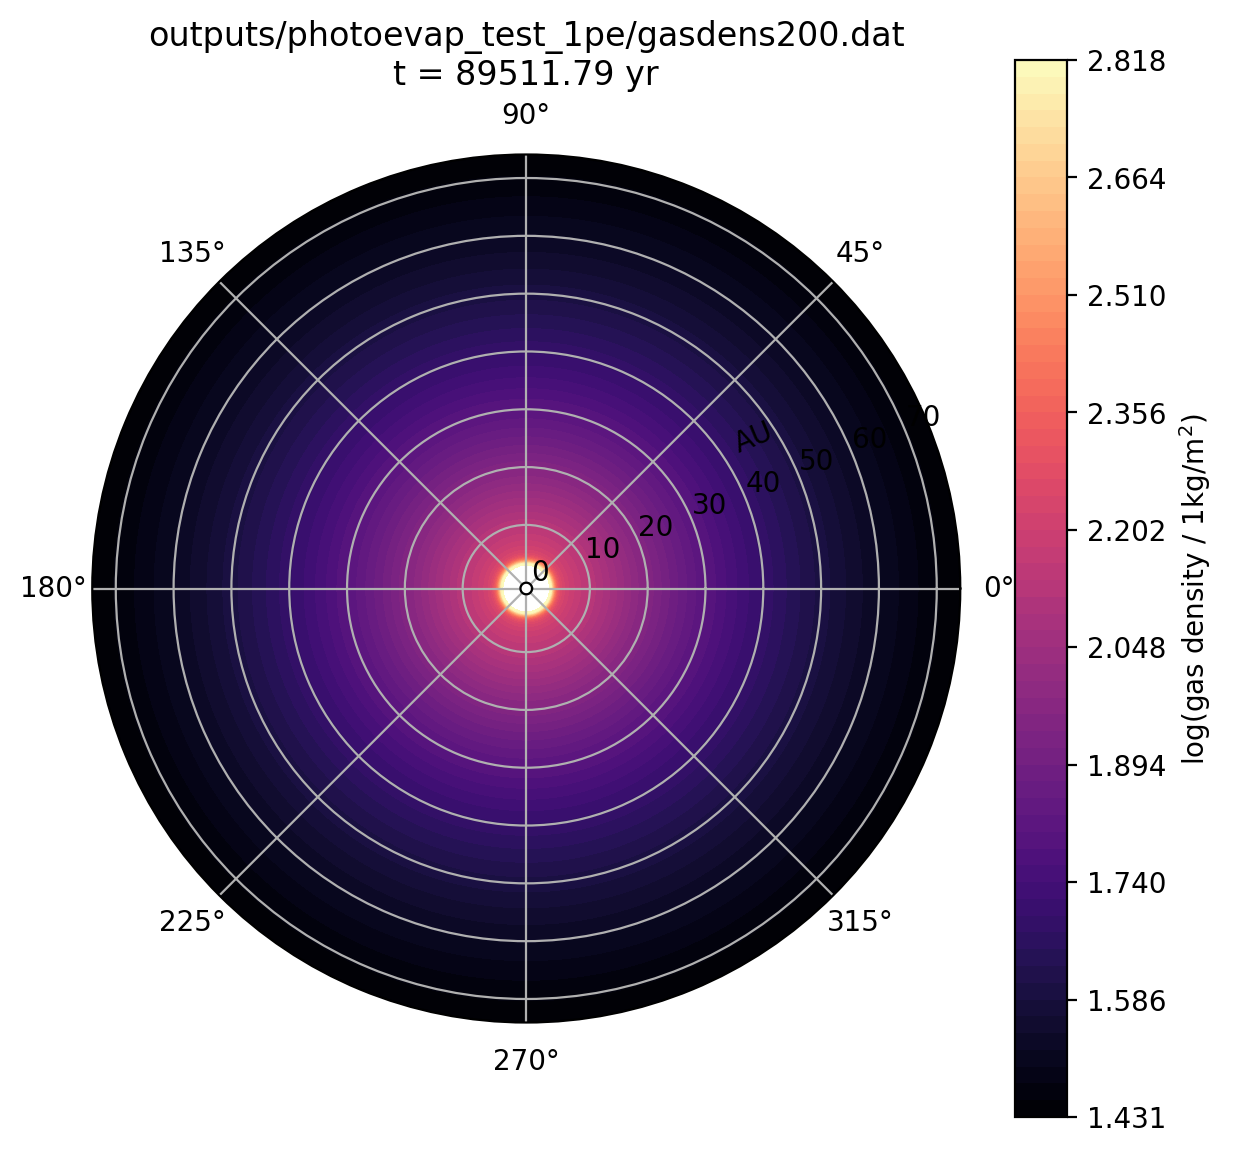

array([1400., 1400.])

In [28]:
plotPolar("outputs/photoevap_test_1pe/gasdens200.dat", "setups/fargo/photoevap_test_1pe.par", True)

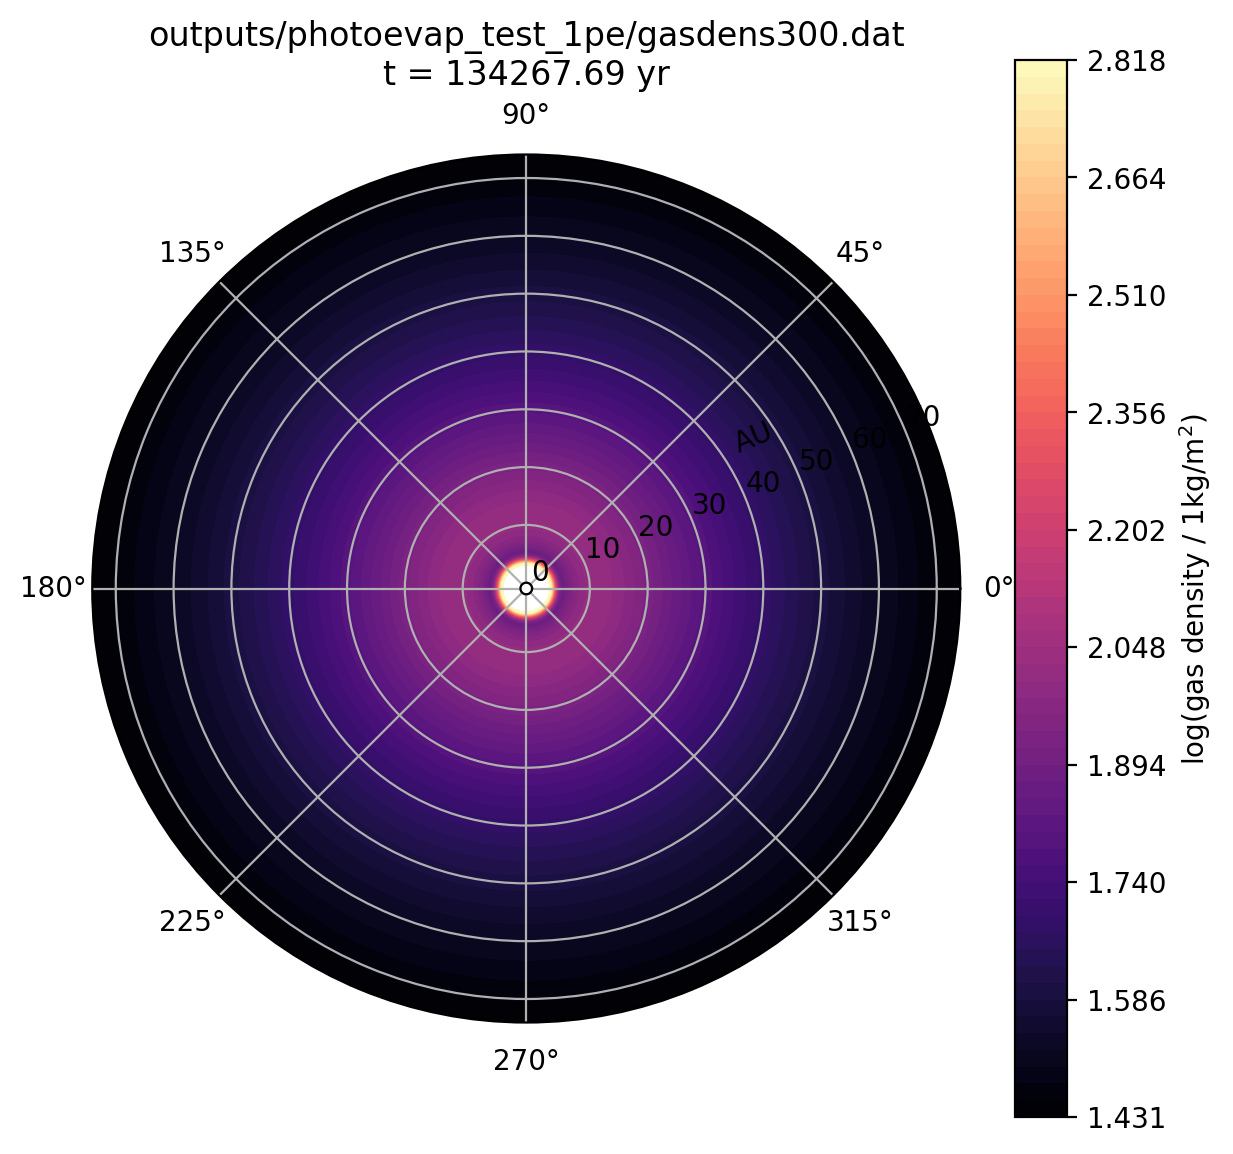

array([1400., 1400.])

In [29]:
plotPolar("outputs/photoevap_test_1pe/gasdens300.dat", "setups/fargo/photoevap_test_1pe.par", True)

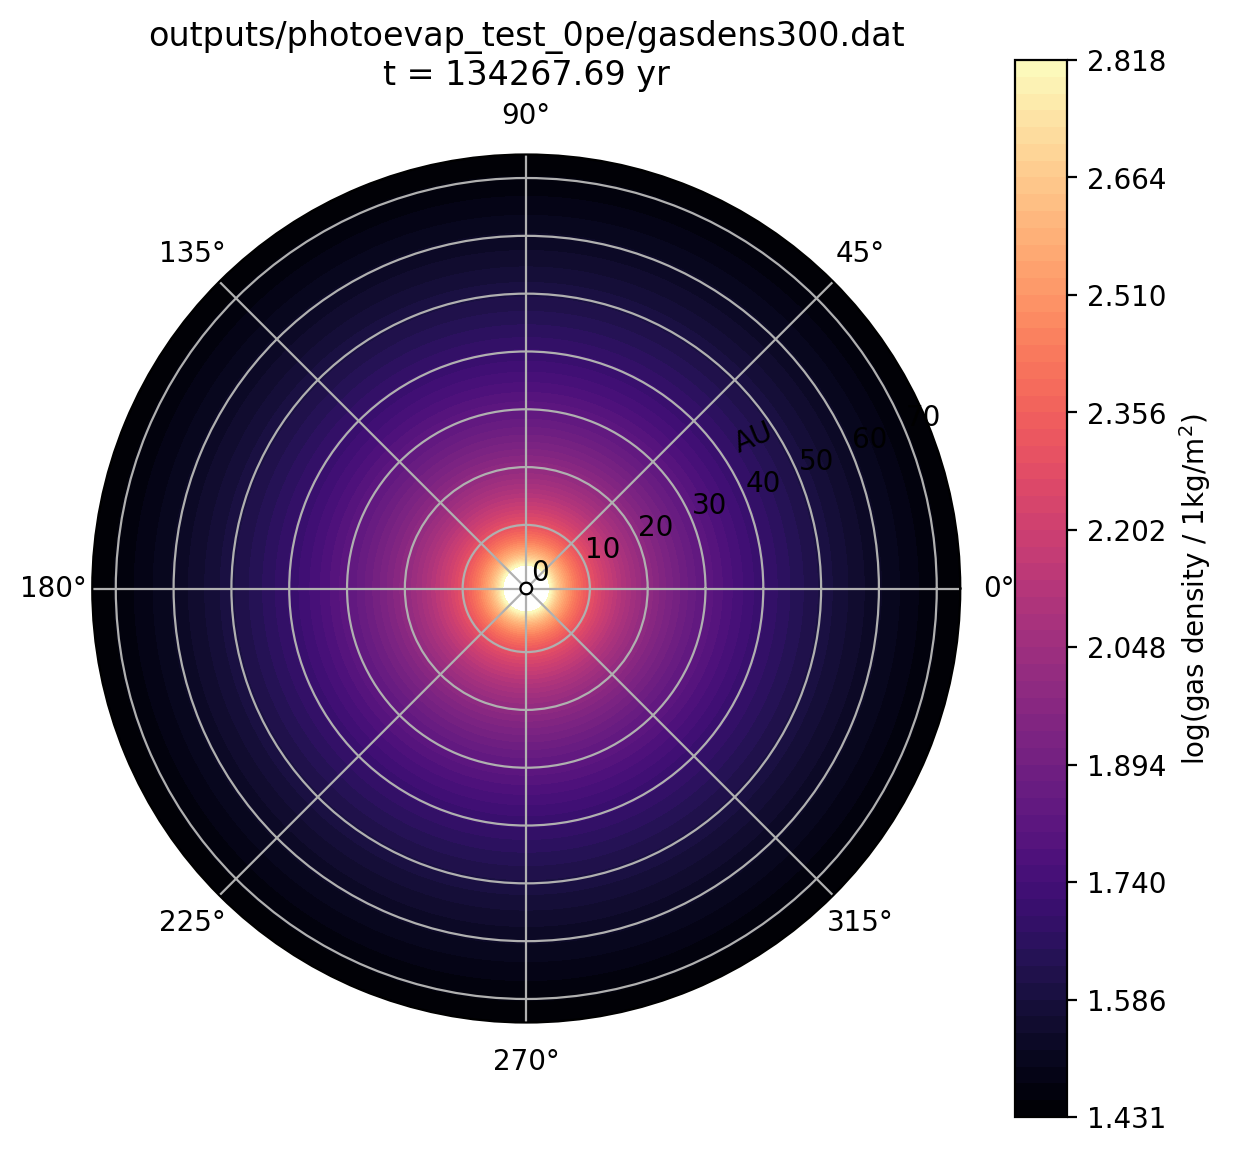

array([1400., 1400.])

In [30]:
plotPolar("outputs/photoevap_test_0pe/gasdens300.dat", "setups/fargo/photoevap_test_0pe.par", True)

In [46]:
values, rad, azm = loadData("outputs/photoevap_test_1pe/gasdens389.dat", "setups/fargo/photoevap_test_1pe.par", False, logRadialSpacing=True, useRealUnits=False)

In [47]:
values

array([[0.00296071, 0.00289105, 0.00282437, ..., 0.0001277 , 0.0001246 ,
        0.00012155],
       [0.00296071, 0.00289105, 0.00282437, ..., 0.0001277 , 0.0001246 ,
        0.00012155],
       [0.00296071, 0.00289105, 0.00282437, ..., 0.0001277 , 0.0001246 ,
        0.00012155],
       ...,
       [0.00296071, 0.00289105, 0.00282437, ..., 0.0001277 , 0.0001246 ,
        0.00012155],
       [0.00296071, 0.00289105, 0.00282437, ..., 0.0001277 , 0.0001246 ,
        0.00012155],
       [0.00296071, 0.00289105, 0.00282437, ..., 0.0001277 , 0.0001246 ,
        0.00012155]])

In [48]:
np.min(values)

1.2213875195728368e-07